In [1]:
import pandas as pd
import numpy as np

import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey

import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
import datetime as dt
import os

#Getting curent directory
os.getcwd()
#Setting curent directory
os.chdir('C:/Work/UCB-DS/Class Notes/Assignment/11')

In [2]:
#Use SQLAlchemy create_engine to connect to your sqlite database.
engine = create_engine("sqlite:///hawaii.sqlite")

#Declare a Base using `automap_base()`
Base = automap_base()

#Use SQLAlchemy automap_base() to reflect your tables into classes and- 
#save a reference to those classes called Station and Measurement
Base.prepare(engine, reflect=True)

#Print all classes mapped to Base
Base.classes.keys()

['measurements', 'station']

In [3]:
#Create the inspector and connect it to the engine
inspector = inspect(engine)

#Collect the names of tables within the database
inspector.get_table_names()

['measurements', 'station']

In [4]:
#Use `engine.execute` to select and display the first 5 rows from the table
engine.execute('SELECT * FROM measurements LIMIT 5').fetchall()

#Reflect DB into ORM class
Station = Base.classes.station
Measurement = Base.classes.measurements

In [5]:
#Start a session to query the database
session = Session(engine)

In [8]:
#### Precipitation Analysis 
#===========================
#Get the last date entry in the data table
lastDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(lastDate)

('9/9/2016',)


In [9]:
#Query to retrieve the last 12 months of precipitation data, last date - 365
lastYear = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(lastYear)

2016-08-23


In [10]:
#Query to pull the last year of precipitation data
rain = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > lastYear).order_by(Measurement.date).all()

In [11]:
#Load the query results into a Pandas DataFrame and set the index to the date column
rainDF = pd.DataFrame(rain)
rainDF.head()    

,date,prcp
0,3/1/2010,0.01
1,3/1/2010,0.04
2,3/1/2010,0.01
3,3/1/2010,0.00
4,3/1/2010,0.01


In [12]:
#Set the index in above DF to the date column
rainDF.set_index('date').head(7)

,prcp
date,
3/1/2010,0.01
3/1/2010,0.04
3/1/2010,0.01
3/1/2010,0.00
3/1/2010,0.01
3/1/2010,0.01
3/1/2010,0.00


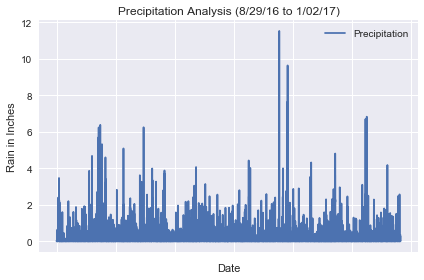

In [13]:
#Plot the result DF using the DataFrame plot method
rainDF.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis (8/29/16 to 1/02/17)")
plt.legend(["Precipitation"])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
#Use Pandas to print the summary statistics for the precipitation data
rainDF.describe()

,prcp
count,11652.000000
mean,0.147622
std,0.448310
min,0.000000
25%,0.000000
50%,0.010000
75%,0.100000
max,11.530000


In [15]:
##Station Analysis
#===================

# Query to count the number of stations in the Measurement table
locations = session.query(Measurement).group_by(Measurement.station).count()
print("There are a total of {} stations.".format(locations))


There are a total of 9 stations.


In [16]:
#Query to find the most active stations
#Stations with the highest num of observations, list counts in descending order
busyStations = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

busiest = busyStations[0][0]    
print("The busiest Station is",busiest,"with",busyStations[0][1],"weather observations.")

The busiest Station is USC00519281 with 2772 weather observations.


In [17]:
print("Here are all of the Stations (in descending order) with their number of observations:")


Here are all of the Stations (in descending order) with their number of observations:


In [18]:
for station, count in busyStations:
    print("Station",station,"had",count, "weather observations.")

Station USC00519281 had 2772 weather observations.
Station USC00519397 had 2724 weather observations.
Station USC00513117 had 2709 weather observations.
Station USC00519523 had 2669 weather observations.
Station USC00516128 had 2612 weather observations.
Station USC00514830 had 2202 weather observations.
Station USC00511918 had 1979 weather observations.
Station USC00517948 had 1372 weather observations.
Station USC00518838 had 511 weather observations.


In [19]:
#Query to retrieve the last 12 months of temperature observation data (tobs)
temperature = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == busiest).\
    filter(Measurement.date > lastYear).\
    order_by(Measurement.date).all()   

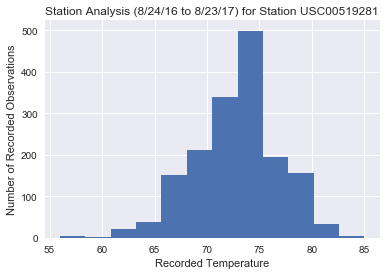

In [20]:
#Plot the temperature data in a histogram with bins=12 
tempDF = pd.DataFrame(temperature)
plt.hist(tempDF['tobs'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station " + busiest)
plt.show() 

In [21]:
## Temperature Analysis
#=========================

#Write a function called calc_temps that will accept a start date and end date in the format %Y-%m-%d 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(startDate, endDate):
    """TMin, TAvg, and TMax for a list of dates.   
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d        
    Returns:
        TMin, TAvg, and TMax
    """  
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= startDate).\
        filter(Measurement.date <= endDate).all()


In [23]:
tempRange = (calc_temps('2014-2-06', '2014-3-06'))
print(tempRange)

[(None, None, None)]


In [24]:
#Calculate the min/max/avg from last year that matches my trip date
tripArrive = dt.date(2016, 9, 24)
tripLeave = dt.date(2016, 9, 30)
lastYr = dt.timedelta(days=365)
tempAvgLastYr = (calc_temps((tripArrive - lastYr), (tripLeave - lastYr)))
print(tempAvgLastYr)

[(None, None, None)]


TypeError: unsupported operand type(s) for +: 'NoneType' and 'NoneType'

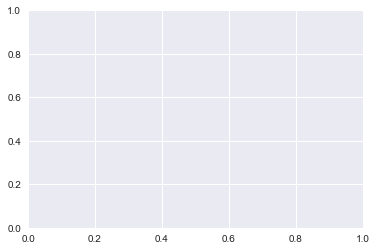

In [25]:
#Plotting boxplot
fig, ax = plt.subplots()
x = range(len(tempAvgLastYr))
ax.boxplot(tempAvgLastYr, patch_artist=True)
ax.set_title('Trip Average Temperature')
ax.set_ylabel("Temperature(F)")
ax.set_xlabel("Trip")
fig.tight_layout()
plt.show()

In [26]:
#Plot a bar chart for the calculated min/max/avg from last year for the trip dates
p2p = tempAvgLastYr[0][2] - tempAvgLastYr[0][0]
avgTemp = tempAvgLastYr[0][1]
minTemp = tempAvgLastYr[0][0]
maxTemp = tempAvgLastYr[0][2]

fig, ax = plt.subplots()
bar_chart = ax.bar(1 , avgTemp, color= 'red', yerr=p2p)
ax.set_xlabel("Trip")
ax.set_ylabel("Temperature")
ax.set_title("Trip Average Temperature From Prior Year")


TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

In [27]:
def autolabels(rects):
    for rect in rects:
        h=rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., .6*h,'%.2f' % float(h) ,ha='center', va='bottom', fontsize=10)
     

In [28]:
# label the bars 
autolabels(bar_chart)        
plt.ylim(0, 100)
plt.xlim(0,2)
fig.tight_layout()
plt.show()

NameError: name 'bar_chart' is not defined